<a href="https://colab.research.google.com/github/Rohithtechis/Forex_pred/blob/main/forex_TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [ ]:
from datetime import datetime
data.Date=pd.to_datetime(data.Date )
data.info()
data['Month']=pd.DatetimeIndex(data['Date']).month
data['Year']=pd.DatetimeIndex(data['Date']).year
data['tday']=pd.DatetimeIndex(data['Date']).day
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2843 non-null   datetime64[ns]
 1   Open       2843 non-null   float64       
 2   High       2843 non-null   float64       
 3   Low        2843 non-null   float64       
 4   Close      2843 non-null   float64       
 5   Adj Close  2843 non-null   float64       
 6   Volume     2843 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 155.6 KB


,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,tday
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,7,2010,1
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,7,2010,2
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,7,2010,6
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,7,2010,7
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,7,2010,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


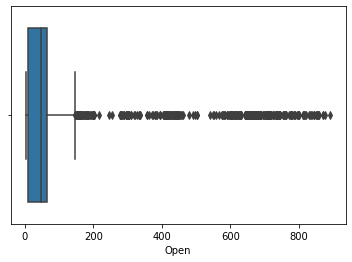

In [ ]:
sns.boxplot(data['Open'])
plt.show()

In [ ]:
Q1 = np.percentile(data['Open'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Open'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Open'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

data=data[data.Open<up_lim]
data=data[data.Open>low_lim]

low limit: -70.78649999999999
upper limit: 146.50549999999998


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


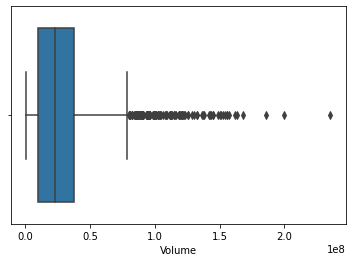

In [ ]:
sns.boxplot(data['Volume'])
plt.show()

In [ ]:
Q1 = np.percentile(data['Volume'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Volume'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Volume'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

data=data[data.Volume<up_lim]
data=data[data.Volume>low_lim]

low limit: -31790750.0
upper limit: 79107250.0


In [ ]:
data=data.drop(['Date','Adj Close','Low','Close','Open'],axis=1)

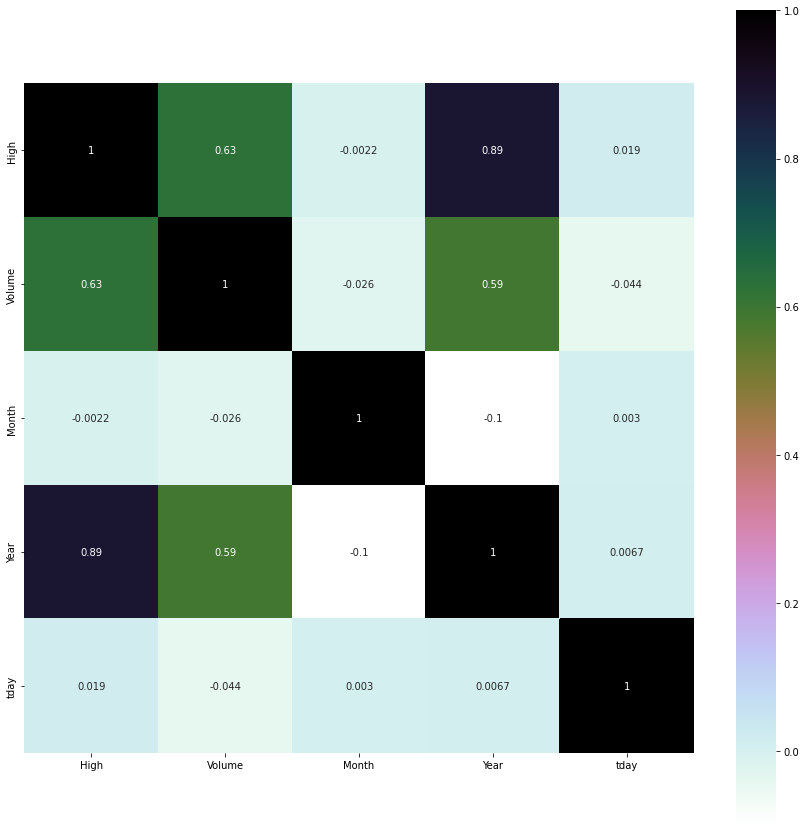

In [ ]:
corr=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True,cmap='cubehelix_r',square=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data,test_size=0.25)

In [ ]:
X_train=train.drop(['High'],axis=1)
y_train=train['High']
X_test=test.drop(['High'],axis=1)
y_test=test['High']

In [ ]:
print('Dimension of X_train dataframe:',X_train.shape)
print('Dimension of y_train dataframe:',y_train.shape)
print('Dimension of X_test dataframe:',X_test.shape)
print('Dimension of y_test dataframe:',y_test.shape)

Dimension of X_train dataframe: (1741, 4)
Dimension of y_train dataframe: (1741,)
Dimension of X_test dataframe: (581, 4)
Dimension of y_test dataframe: (581,)


In [ ]:
from sklearn.linear_model import LinearRegression
ln_reg= LinearRegression()
ln_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

y_pred = ln_reg.predict(X_test)
print("Accuracy: ", ln_reg.score(X_test,y_test))
print('Mean Absolute Error of linear regression:',mean_absolute_error(y_pred, y_test))
print('Mean Square Error of linear regression:', mean_squared_error(y_pred, y_test))
print('R_Squared Score of linear regression:', r2_score(y_pred, y_test))

Accuracy:  0.8134587887737469
Mean Absolute Error of linear regression: 8.206761960737579
Mean Square Error of linear regression: 114.15420933862409
R_Squared Score of linear regression: 0.7493132889308338


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
rfcl = RandomForestRegressor(max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))

The Random forest model accuracy is 0.9655745120656904
